In [1]:
from scheduler_vm_task.master_machine.interval_predictor import CO2Predictor, IntervalGenerator
from scheduler_vm_task.master_machine.utils import code_names
co2_predictor = CO2Predictor()
co2_forecast = co2_predictor.predict_co2()

interval_generator = IntervalGenerator(code_names)

2023-07-18 11:26:01.525610: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-18 11:26:01.579514: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-18 11:26:02.452042: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:4                                                                                    │
│                                                                                                  │
│   1 from scheduler_vm_task.master_machine.interval_predictor import CO2Predictor, IntervalGe     │
│   2 from scheduler_vm_task.master_machine.utils import code_names                                │
│   3 co2_predictor = CO2Predictor()                                                               │
│ ❱ 4 co2_forecast = co2_predictor.predict_co2()                                                   │
│   5                                                                                              │
│   6 interval_generator = IntervalGenerator(code_names)                                           │
│   7                                                                                              │
│                                                                                                  │
│ /home/lazarev/disk/tiutiulnikov/SmartScheduler/scheduler_vm_task/master_machine/interval_predict │
│ or.py:109 in predict_co2                                                                         │
│                                                                                                  │
│   106 │   │   batch = torch.tensor(batch.astype(np.float32))                                     │
│   107 │   │   batch = batch.permute((0, 2, 3, 1))                                                │
│   108 │   │                                                                                      │
│ ❱ 109 │   │   self.emission_forecast = self.predict_model.predict_step((batch, 0, 0), 0)         │
│   110 │   │   self.emission_forecast = self.emission_forecast.detach().cpu().numpy()             │
│   111 │   │                                                                                      │
│   112 │   │   return self.emission_forecast                                                      │
│                                                                                                  │
│ /home/lazarev/disk/tiutiulnikov/SmartScheduler/scheduler_vm_task/master_machine/co2_model.py:151 │
│ in predict_step                                                                                  │
│                                                                                                  │
│   148 │                                                                                          │
│   149 │   def predict_step(self, batch, batch_idx):                                              │
│   150 │   │   x, y, _ = batch                                                                    │
│ ❱ 151 │   │   preds = self.forward(x)                                                            │
│   152 │   │   return preds                                                                       │
│   153 │                                                                                          │
│   154 │   def training_step(self, batch, batch_idx):                                             │
│                                                                                                  │
│ /home/lazarev/disk/tiutiulnikov/SmartScheduler/scheduler_vm_task/master_machine/co2_model.py:143 │
│ in forward                                                                                       │
│                                                                                                  │
│   140 │   │                                                                                      │
│   141 │   │   batch_size, lookback, features_num, points_num = x.shape                           │
│   142 │   │   x = x.reshape((batch_size, features_num*points_num, lookback))                     │
│ ❱ 143 │   │   emb = self.tcn(x)[:, :, -1]                  

In [2]:
co2_forecast.shape

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 co2_forecast.shape                                                                           │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'co2_forecast' is not defined

In [3]:
intervals = interval_generator.generate_intervals(
    forecasts=co2_forecast,
    max_emission_value=130,
    co2_delta_to_move=0,
    min_interval_size=1,
    # exclude_zones=['FR'],
    # include_zones=['BR-CS']
)


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 intervals = interval_generator.generate_intervals(                                           │
│   2 │   forecasts=co2_forecast,                                                                  │
│   3 │   max_emission_value=130,                                                                  │
│   4 │   co2_delta_to_move=0,                                                                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'interval_generator' is not defined

In [4]:
intervals

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 intervals                                                                                    │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'intervals' is not defined

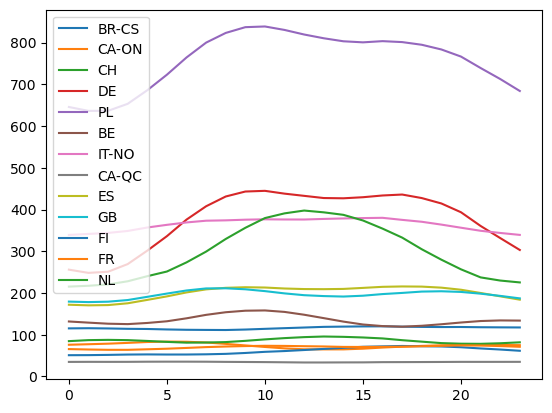

In [6]:
import matplotlib.pyplot as plt

for f, z in zip(co2_forecast, code_names):
    # if z in [i[0] for i in intervals]:
    plt.plot(f, label=z)

plt.legend()